# STOCK PREDICTION :NETFLIX
## BHARAT INTERN [TASK 1]:

###### Importing necessary libraries

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [169]:
#Load csv
df=pd.read_csv('NFLX.csv')

In [170]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [172]:
#The 'Date' column of 'object'dtype is converted into datetime64  
import datetime 

def str_to_datetime(s):
    split=s.split('-')
    year, month,day =int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year , month= month ,day=day)

In [173]:
df['Date']=df['Date'].apply(str_to_datetime)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [175]:
#Splitting data into training and testing
training_set=pd.DataFrame(df['Close'][0:int(len(df)* 0.70)])
testing_set=pd.DataFrame(df['Close'][int(len(df)* 0.70): int(len(df))])

#### Data Normalization

In [176]:
#Changing the values of numeric column into common scale
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
training_set_scaled=scaler.fit_transform(training_set)

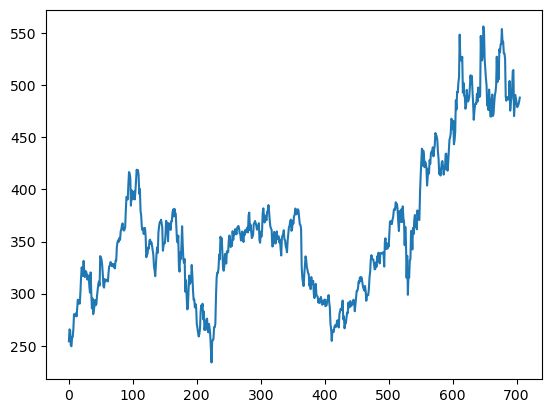

In [177]:
plt.plot(training_set)
plt.show()

#### Incorporating timesteps into data

In [178]:
#Iniatializing empty lists for training data input and output
X_train=[]
y_train=[]

#Set the number of days used for prediction
timesteps=100

#Iterate through the scaled data
for i in range(timesteps , len(training_set_scaled)):
    #Append the previous timesteps values to X_train
    X_train.append(training_set_scaled[i-timesteps: i,0])
    #Append the current value to y_tran
    y_train.append(training_set_scaled[i,0])

In [179]:
#Converting X_train and y_train in numpy arrays
X_train=np.array(X_train)
y_train=np.array(y_train)

#### Creating the LSTM model

In [180]:
from  keras.models import Sequential    #for initializaing the neural network
from keras.layers import Dense         #to add a densely connected nueral layer
from keras.layers import LSTM          #to add the LSTM layers
from keras.layers import Dropout       #for preventing overfitting with  dropout layers

In [181]:
#Initailize a Sequential model
model=Sequential()

#Add the LSTM layer  with units,return_sequence and input_shape
model.add(LSTM(units=50 ,return_sequences=True, input_shape=(X_train.shape[1],1)))
#Add dropout to prevent overfitting
model.add(Dropout(0.2))


#Adding a second  LSTM layer with units and return_sequence
model.add(LSTM(units=50 ,return_sequences=True))
#Add dropout to prevent overfitting
model.add(Dropout(0.2))

#Adding a third LSTM layer with units
model.add(LSTM(units=50))
#Add dropout to prevent overfitting
model.add(Dropout(0.2))

#Add a dense output layer
model.add(Dense(units=1))

In [182]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_18 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_20 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_19 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_21 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_20 (Dropout)        (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [183]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=25)

Epoch 1/25
19/19 [==============================] - 8s 94ms/step - loss: 0.0492
Epoch 2/25
19/19 [==============================] - 2s 111ms/step - loss: 0.0105
Epoch 3/25
19/19 [==============================] - 2s 103ms/step - loss: 0.0089
Epoch 4/25
19/19 [==============================] - 2s 95ms/step - loss: 0.0089
Epoch 5/25
19/19 [==============================] - 2s 96ms/step - loss: 0.0083
Epoch 6/25
19/19 [==============================] - 2s 95ms/step - loss: 0.0079
Epoch 7/25
19/19 [==============================] - 2s 95ms/step - loss: 0.0073
Epoch 8/25
19/19 [==============================] - 2s 95ms/step - loss: 0.0072
Epoch 9/25
19/19 [==============================] - 2s 94ms/step - loss: 0.0069
Epoch 10/25
19/19 [==============================] - 2s 94ms/step - loss: 0.0070
Epoch 11/25
19/19 [==============================] - 2s 95ms/step - loss: 0.0075
Epoch 12/25
19/19 [==============================] - 2s 95ms/step - loss: 0.0069
Epoch 13/25
19/19 [================

In [184]:
model.save('keras_model.h5')

C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [185]:
testing_set   #30% data of df

,Close
706,476.619995
707,482.880005
708,485.000000
709,491.359985
710,490.700012
...,...
1004,427.140015
1005,457.130005
1006,429.480011
1007,405.600006


In [186]:
training_set  #70% data of df

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001
...,...
701,479.100006
702,480.630005
703,481.790009
704,484.670013


In [187]:
past_100_days= training_set.tail(100)
# Concatenating the testing_set with the past_100_days(timesteps)
final_df=pd.concat((past_100_days,testing_set),axis=0)

In [188]:
final_df

,Close
606,476.890015
607,493.809998
608,493.160004
609,502.779999
610,507.760010
...,...
1004,427.140015
1005,457.130005
1006,429.480011
1007,405.600006


In [189]:
#Scaling the testing data
input_data=scaler.fit_transform(final_df)
input_data

array([[0.35299258],
       [0.40395792],
       [0.40200005],
       [0.43097681],
       [0.4459773 ],
       [0.56938454],
       [0.49941261],
       [0.4975451 ],
       [0.49266545],
       [0.5051056 ],
       [0.40148794],
       [0.42986233],
       [0.39278291],
       [0.39193951],
       [0.35507087],
       [0.36371579],
       [0.40950024],
       [0.38799362],
       [0.3758547 ],
       [0.37983066],
       [0.3891081 ],
       [0.4184463 ],
       [0.45164013],
       [0.42895864],
       [0.44995325],
       [0.40672913],
       [0.37254133],
       [0.32299161],
       [0.3487153 ],
       [0.36636639],
       [0.3704328 ],
       [0.36943883],
       [0.39811436],
       [0.37600527],
       [0.41627756],
       [0.39943971],
       [0.38889723],
       [0.39422868],
       [0.56577012],
       [0.50173202],
       [0.49456311],
       [0.51164189],
       [0.59293949],
       [0.58176457],
       [0.50016565],
       [0.47094786],
       [0.44374825],
       [0.423

In [195]:
input_data.shape

(403, 1)

In [196]:
#Initializing an empty list for test data input
x_test=[]
y_test=[]
#Iterate through the sacled 'input_data'
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i,0])
    
    
#Converting the  x_test and  y_test lists into numpy array
x_test=np.array(x_test)
y_test=np.array(y_test)
print( x_test.shape)
print( y_test.shape)

(303, 100, 1)
(303,)


In [208]:
#Generate Predictions
y_predicted=model.predict(x_test)

y_predicted.shape

10/10 [==============================] - 0s 35ms/step


(303, 1)

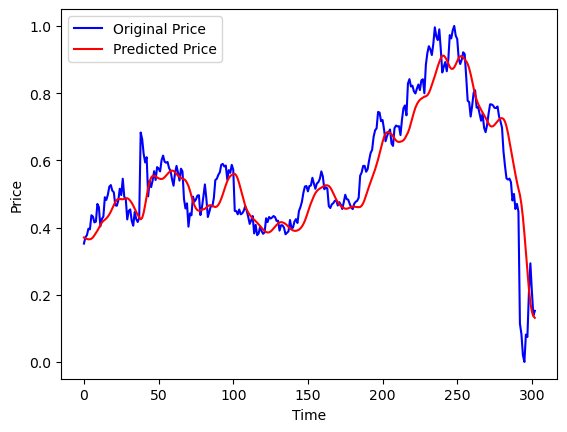

In [209]:
#Plotting the y_test and y_predicted
plt.plot(y_test, 'b',label='Original Price')
plt.plot(y_predicted, 'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
